<a href="https://colab.research.google.com/github/JustMichele/Senai-Programa-o-em-Python/blob/main/Projeto_7_final_Senai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nível Médio

Análise de Dados: Dinheiro traz felicidade?

In [ ]:
import pandas as pd

Importamos o arquivo com dados do produto interno bruto(GDP) de cada país em média em dolares por ano. (Fonte FMI)

In [ ]:
dataframe_money = pd.read_csv('money.csv', sep = ',')
dataframe_money.head(10)

,Country,GDP
0,Australia,50961.865
1,Austria,43724.031
2,Belgium,40106.632
3,Belize,4841.735
4,Bolivia,2886.231
5,Botswana,6040.957
6,Brazil,8669.998
7,Bulgaria,6831.661
8,Canada,43331.961
9,Chile,13340.905


O arquivo happiness.csv seria o grau de satisfação em geral na vida das pessoas em cada país (Baseado nos dados da OCDE de 2017)

In [ ]:
dataframe_happiness = pd.read_csv('happiness.csv', sep = ',')
dataframe_happiness.head(10)

,Country,Happiness
0,Australia,7.5
1,Austria,7.6
2,Belgium,7.3
3,Brazil,6.6
4,Canada,7.6
5,Chile,5.7
6,Colombia,6.3
7,Czech Republic,6.7
8,Denmark,7.9
9,Estonia,5.4


Aqui juntamos as tabelas utilizando o merge. A coluna em comum(inner) será o país e países que não estão em comum ambas as tabelas será descartado.




In [ ]:
df_money_happiness = pd.merge(dataframe_money, dataframe_happiness, how = 'inner', on = 'Country')

In [ ]:
df_money_happiness.head(20)

,Country,GDP,Happiness
0,Australia,50961.865,7.5
1,Austria,43724.031,7.6
2,Belgium,40106.632,7.3
3,Brazil,8669.998,6.6
4,Canada,43331.961,7.6
5,Chile,13340.905,5.7
6,Colombia,6083.510,6.3
7,Czech Republic,17256.918,6.7
8,Denmark,52114.165,7.9
9,Estonia,17288.083,5.4


Vamos fazer a apredizagem de máquina aplicando a Regressão Linear.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

Os dados do GDP estavam em formato string, aqui vamos converter para número real.

In [ ]:
df_money_happiness['GDP'] = df_money_happiness['GDP'].apply(float)

In [ ]:
X = np.array(df_money_happiness['GDP']).reshape(-1,1)#Tabela estava em lista, usamos o reshape para transformar em matriz
y = df_money_happiness['Happiness']

In [ ]:
X #X são as features

array([[ 50961.865],
       [ 43724.031],
       [ 40106.632],
       [  8669.998],
       [ 43331.961],
       [ 13340.905],
       [  6083.51 ],
       [ 17256.918],
       [ 52114.165],
       [ 17288.083],
       [ 41973.988],
       [ 37675.006],
       [ 40996.511],
       [ 18064.288],
       [ 12239.894],
       [ 50854.583],
       [ 51350.744],
       [ 35343.336],
       [ 29866.581],
       [ 32485.545],
       [ 27195.197],
       [ 13618.569],
       [ 14210.28 ],
       [101994.093],
       [  9009.28 ],
       [ 43603.115],
       [ 37044.891],
       [ 74822.106],
       [ 12495.334],
       [ 19121.592],
       [  9054.914],
       [ 15991.736],
       [ 20732.482],
       [  5694.572],
       [ 25864.721],
       [ 49866.266],
       [ 80675.308],
       [  9437.372],
       [ 43770.688],
       [ 55805.204]])

In [ ]:
y #y são os rótulos

0     7.5
1     7.6
2     7.3
3     6.6
4     7.6
5     5.7
6     6.3
7     6.7
8     7.9
9     5.4
10    7.2
11    5.9
12    7.4
13    4.4
14    5.1
15    7.4
16    7.2
17    7.4
18    5.7
19    6.0
20    6.1
21    5.4
22    5.6
23    6.8
24    6.5
25    7.7
26    7.4
27    7.5
28    6.2
29    4.7
30    5.7
31    7.1
32    5.9
33    4.7
34    6.1
35    7.7
36    7.5
37    5.2
38    6.8
39    7.4
Name: Happiness, dtype: float64

In [ ]:
linear_regression_model = sklearn.linear_model.LinearRegression()
linear_regression_model.fit(X,y)

LinearRegression()

Na tabela (os pontos são países) podemos verificar que o grau de satisfação é alto até 60.000 dolares por ano, após este valor o grau começa cair.

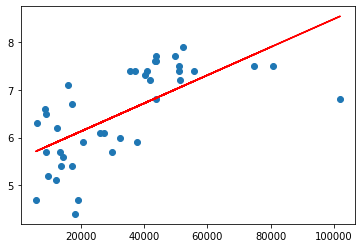

In [ ]:
prediction_y = linear_regression_model.predict(X)

plt.scatter(X,y)
plt.plot(X, prediction_y, color= 'red')
plt.show()

Posso prever o grau de satisfação de um país que não estava presente na tabela do merge como por ex: 

In [ ]:
saudiarabia_gdp2017 = [[20812.586]]

In [ ]:
linear_regression_model.predict(saudiarabia_gdp2017)

array([6.15385205])

E qual seria a satisfação média de vida no ano de 2017 colocando dados de GDP de 2020:

In [ ]:
brazil_gdp2020 = [[6796.844]]

In [ ]:
linear_regression_model.predict(brazil_gdp2020)

array([5.74185701])

In [ ]:
japan_gdp2020 = [[40193.252]]

In [ ]:
linear_regression_model.predict(japan_gdp2020)

array([6.72354991])

In [ ]:
usa_gdp2020 = [[63593.44]]

In [ ]:
linear_regression_model.predict(usa_gdp2020)

array([7.41140229])

Verificando a sua corrrelação.

In [ ]:
import seaborn as sns
df_money_happiness.corr()

,GDP,Happiness
GDP,1.00000,0.65698
Happiness,0.65698,1.00000


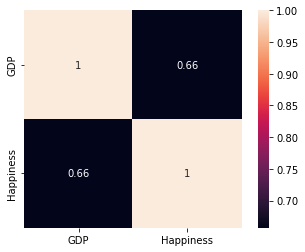

In [ ]:
sns.heatmap(df_money_happiness.corr(), annot = True, square = True)

Conclusão:
Verificamos na tabela (plt.show) a partir do valor 60.000 doláres o grau de satisfação tem tendência a cair, e a correlação GDP e happiness demonstra ser um nível moderado.